# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

# Load Data

In [ ]:
df = pd.read_csv('train (1).csv')
df.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,314.0,NaN,0,Transient,38.4,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,...,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.8,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,...,0,0,A,A,0,Non Refund,12.0,NaN,0,Transient,110.0,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,0.0,0,BB,NaN,Corporate,Corporate,...,0,0,A,A,0,No Deposit,NaN,200.0,0,Transient,45.0,0,0,Check-Out,2018-10-18,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

In [ ]:
# checking duplicate
df.duplicated().sum()

0

In [ ]:
# Check Data Imbalance
df.is_canceled.value_counts(normalize=True)

,proportion
is_canceled,
0,0.630497
1,0.369503


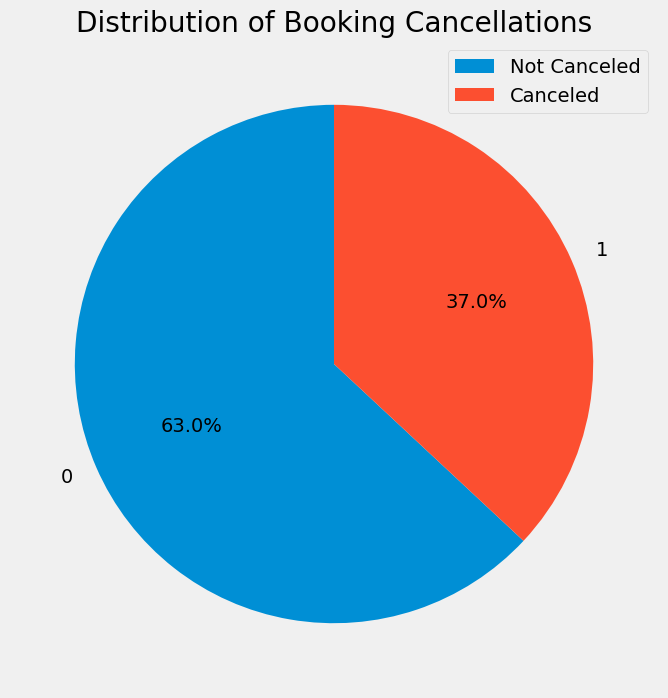

In [ ]:
# Visualisasi is_canceled pie chart
plt.figure(figsize=(10, 8))
df['is_canceled'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Booking Cancellations')
plt.ylabel('')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

In [ ]:
# Check Percentage Null Values
df.isnull().sum().sort_values(ascending=False)/len(df)*100

,0
company,94.316449
agent,13.691427
country,0.415401
children,0.003602
hotel,0.000000
assigned_room_type,0.000000
booking_changes,0.000000
deposit_type,0.000000
days_in_waiting_list,0.000000
previous_bookings_not_canceled,0.000000


# Data Clean

In [ ]:
df['children'].value_counts()

,count
children,
0.0,77329
1.0,3351
2.0,2558
3.0,51
10.0,1


In [ ]:
# Impute missing values in 'children' column with 0
df['children'] = df['children'].fillna(0)

# Check if there are any missing values left in 'children' column
df['children'].isnull().sum()

0

In [ ]:
# dropping columns that are not useful

useless_col = ['hotel', 'days_in_waiting_list',
               'arrival_date_year', 'booking_changes',
               'reservation_status', 'country',
               'bookingID', 'agent', 'company']

df.drop(useless_col, axis = 1, inplace = True)

In [ ]:
# Check
df.isna().sum()

,0
is_canceled,0
lead_time,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0
babies,0


# EDA

In [ ]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,83293.0,0.369503,0.482673,0.0,0.00,0.0,1.0,1.0
lead_time,83293.0,103.914230,106.874124,0.0,18.00,69.0,160.0,737.0
arrival_date_week_number,83293.0,27.164023,13.623752,1.0,16.00,27.0,38.0,53.0
arrival_date_day_of_month,83293.0,15.786116,8.775931,1.0,8.00,16.0,23.0,31.0
stays_in_weekend_nights,83293.0,0.930390,1.004196,0.0,0.00,1.0,2.0,19.0
stays_in_week_nights,83293.0,2.503812,1.924511,0.0,1.00,2.0,3.0,50.0
adults,83293.0,1.854466,0.606139,0.0,2.00,2.0,2.0,55.0
children,83293.0,0.103610,0.398815,0.0,0.00,0.0,0.0,10.0
babies,83293.0,0.008032,0.100641,0.0,0.00,0.0,0.0,10.0
is_repeated_guest,83293.0,0.030243,0.171255,0.0,0.00,0.0,0.0,1.0


In [ ]:
# Average monthly rate per room
city_hotel=df.groupby(['arrival_date_month'])['adr'].mean().reset_index().sort_values(by='adr',ascending=False)
city_hotel

,arrival_date_month,adr
1,August,140.017486
5,July,127.483572
6,June,116.743453
8,May,108.268438
11,September,104.867325
0,April,99.881671
10,October,87.719849
2,December,81.332429
7,March,80.435213
9,November,73.590839


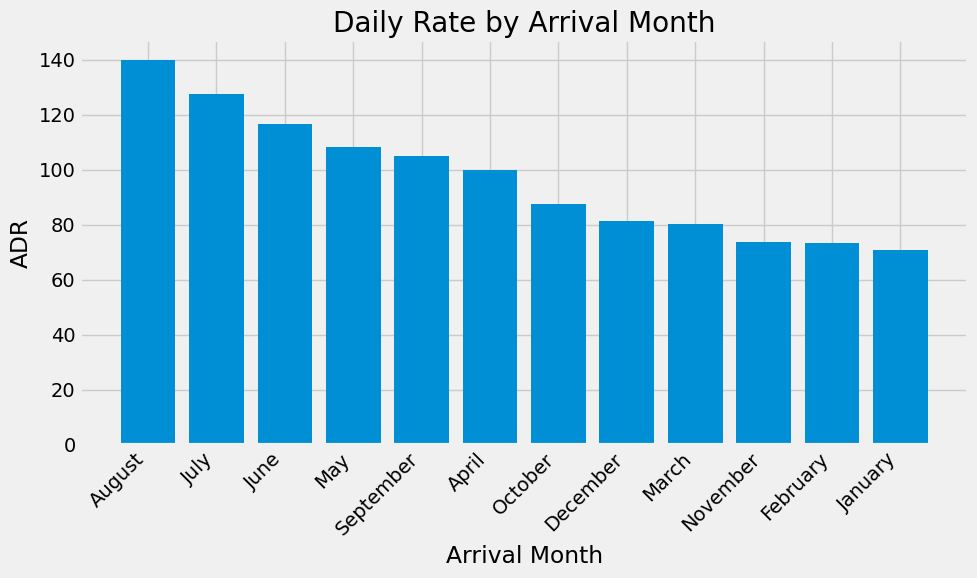

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(city_hotel['arrival_date_month'], city_hotel['adr'])
plt.xlabel('Arrival Month')
plt.ylabel('ADR')
plt.title('Daily Rate by Arrival Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


berurutan bulan

In [ ]:
resort_guests = df['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,9643
1,July,8731
2,May,8222
3,April,7787
4,October,7741
5,June,7666
6,September,7398
7,March,6810
8,February,5560
9,November,4779


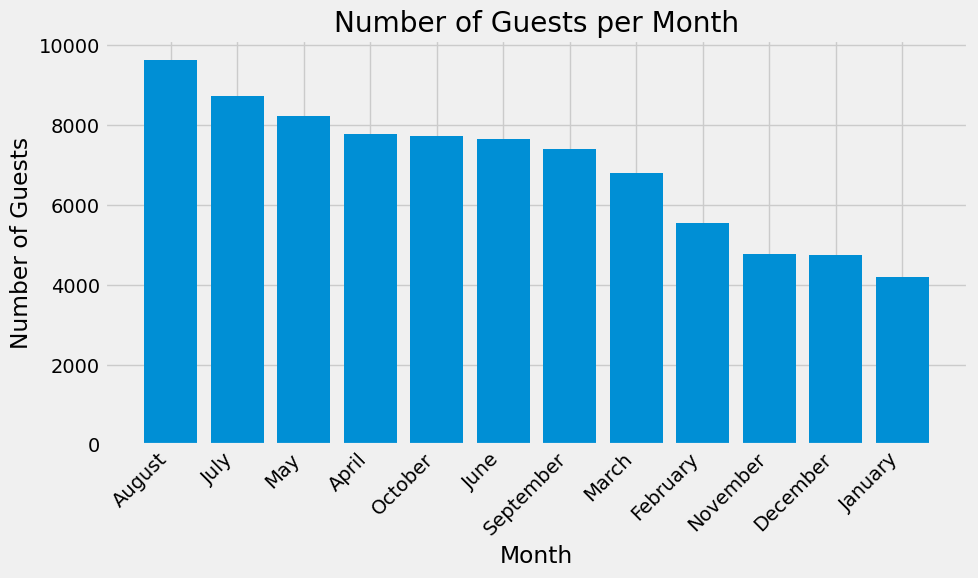

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(resort_guests['month'], resort_guests['no of guests'])
plt.xlabel('Month')
plt.ylabel('Number of Guests')
plt.title('Number of Guests per Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

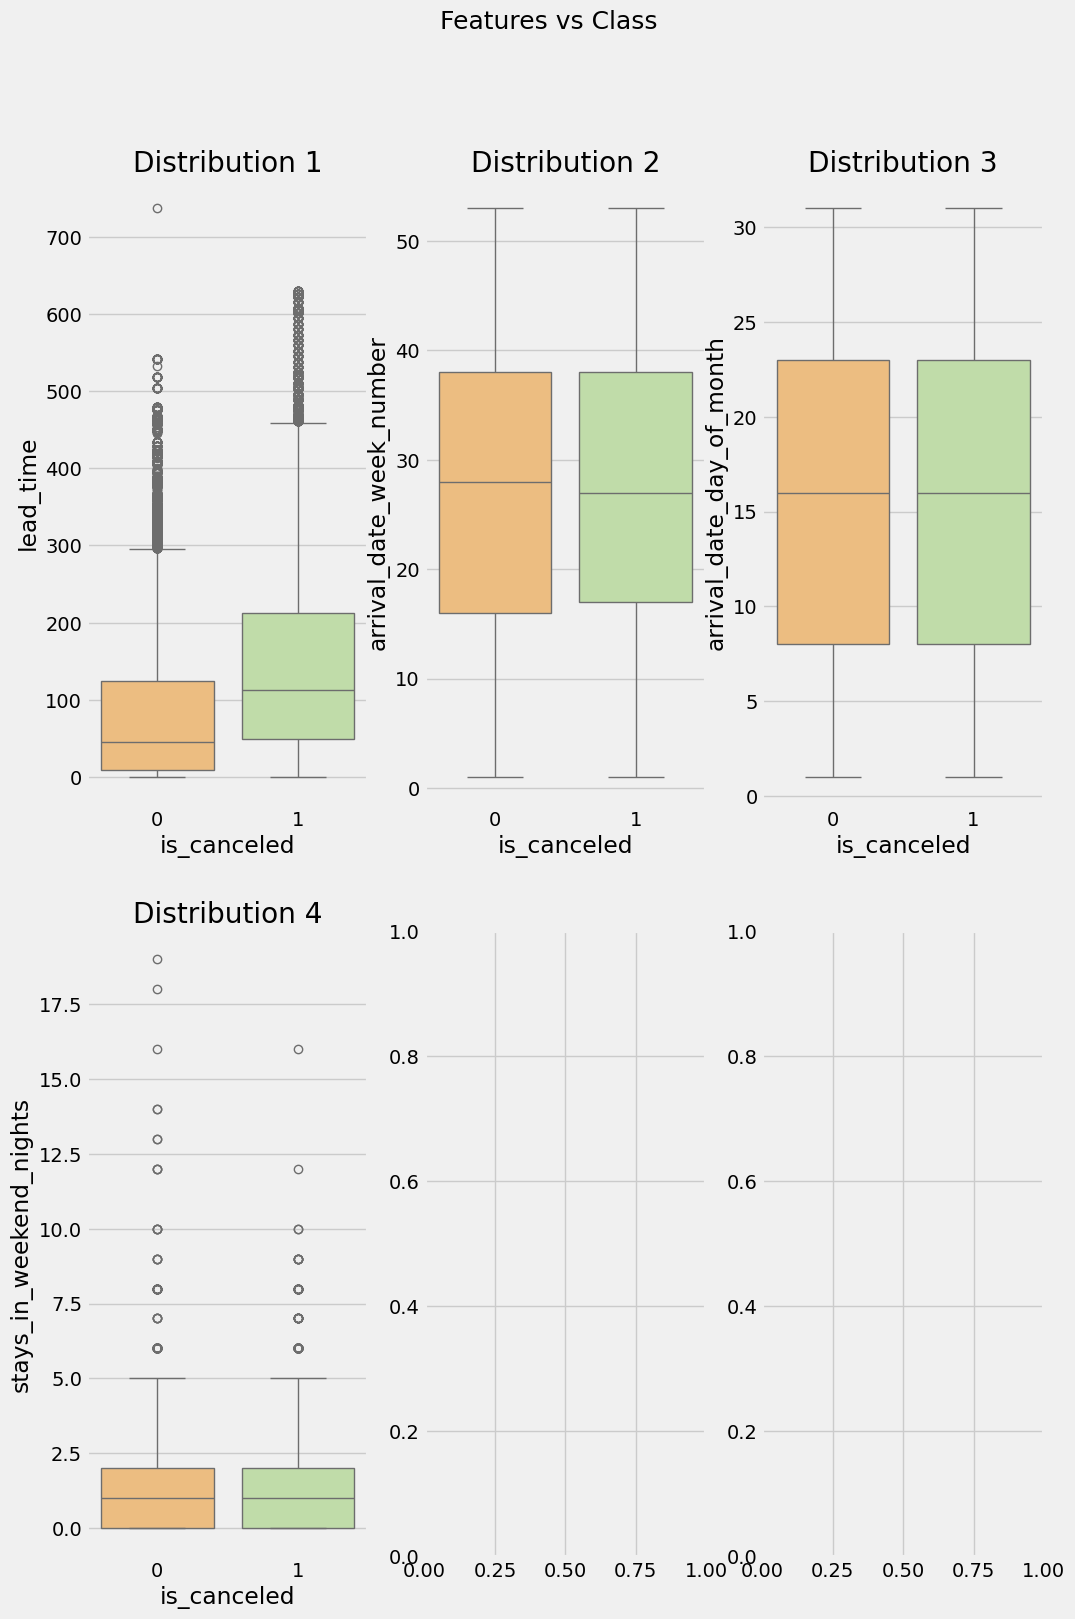

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(11,17))
fig.suptitle('Features vs Class\n', size = 18)

sns.boxplot(ax=axes[0, 0], data=df, x='is_canceled', y='lead_time', palette='Spectral')
axes[0,0].set_title("Distribution 1");

sns.boxplot(ax=axes[0, 1], data=df, x='is_canceled', y='arrival_date_week_number', palette='Spectral')
axes[0,1].set_title("Distribution 2");

sns.boxplot(ax=axes[0, 2], data=df, x='is_canceled', y='arrival_date_day_of_month', palette='Spectral')
axes[0,2].set_title("Distribution 3");

sns.boxplot(ax=axes[1, 0], data=df, x='is_canceled', y='stays_in_weekend_nights', palette='Spectral')
axes[1,0].set_title("Distribution 4");

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     83293 non-null  int64  
 1   lead_time                       83293 non-null  int64  
 2   arrival_date_month              83293 non-null  object 
 3   arrival_date_week_number        83293 non-null  int64  
 4   arrival_date_day_of_month       83293 non-null  int64  
 5   stays_in_weekend_nights         83293 non-null  int64  
 6   stays_in_week_nights            83293 non-null  int64  
 7   adults                          83293 non-null  int64  
 8   children                        83293 non-null  float64
 9   babies                          83293 non-null  int64  
 10  meal                            83293 non-null  object 
 11  market_segment                  83293 non-null  object 
 12  distribution_channel            

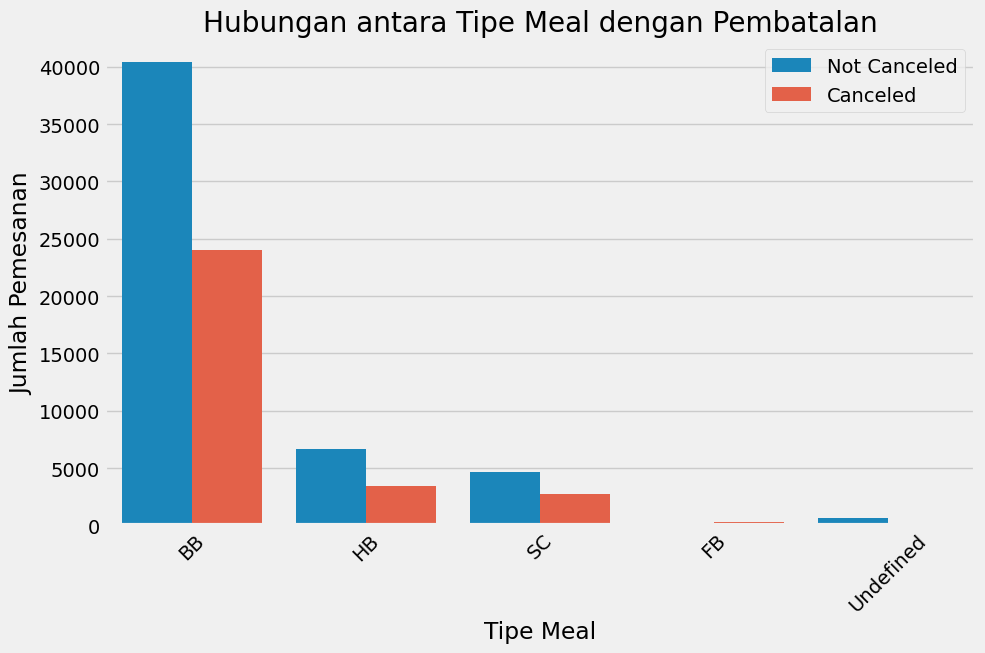

In [ ]:
# Visualisasi hubungan antara meal dengan is_canceled
plt.figure(figsize=(10, 6))
sns.countplot(x='meal', hue='is_canceled', data=df)
plt.title('Hubungan antara Tipe Meal dengan Pembatalan')
plt.xlabel('Tipe Meal')
plt.ylabel('Jumlah Pemesanan')
plt.xticks(rotation=45)
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

In [ ]:
# prompt: Visualisasi hubungan antara meal dengan is_canceled



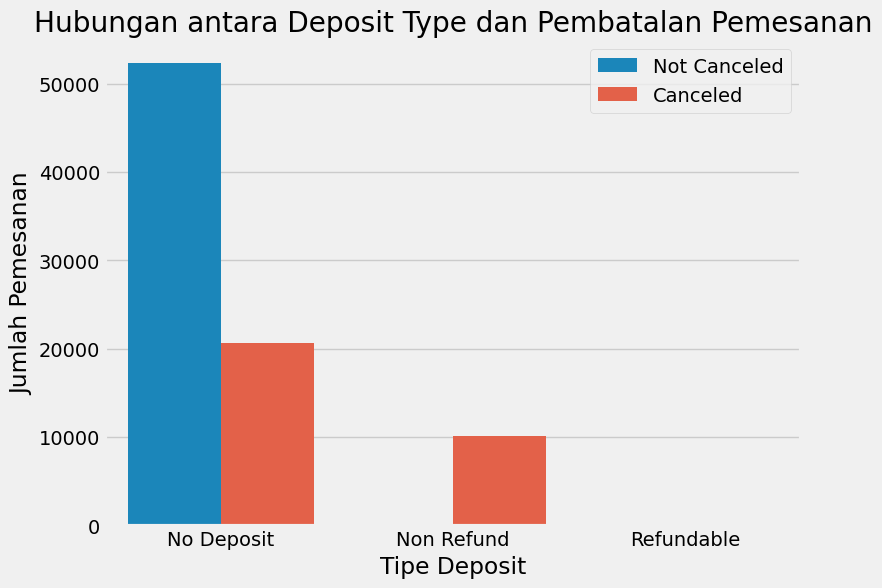

In [ ]:
# Visualisasi hubungan antara deposit_type dengan is_canceled
plt.figure(figsize=(8, 6))
sns.countplot(x='deposit_type', hue='is_canceled', data=df)
plt.title('Hubungan antara Deposit Type dan Pembatalan Pemesanan')
plt.xlabel('Tipe Deposit')
plt.ylabel('Jumlah Pemesanan')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

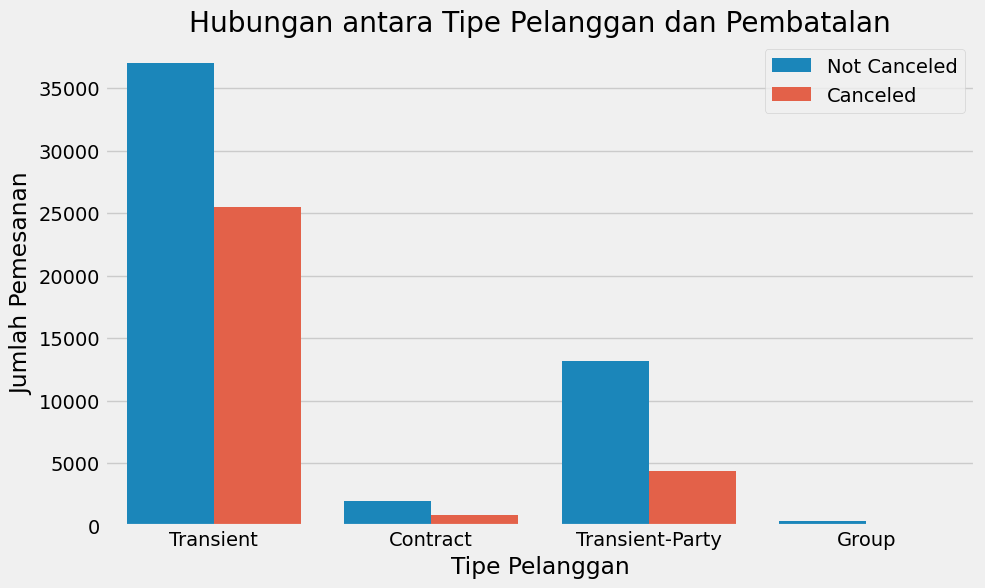

In [ ]:
# Visualisasi hubungan antara customer_type dengan is_canceled
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='is_canceled', data=df)
plt.title('Hubungan antara Tipe Pelanggan dan Pembatalan')
plt.xlabel('Tipe Pelanggan')
plt.ylabel('Jumlah Pemesanan')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

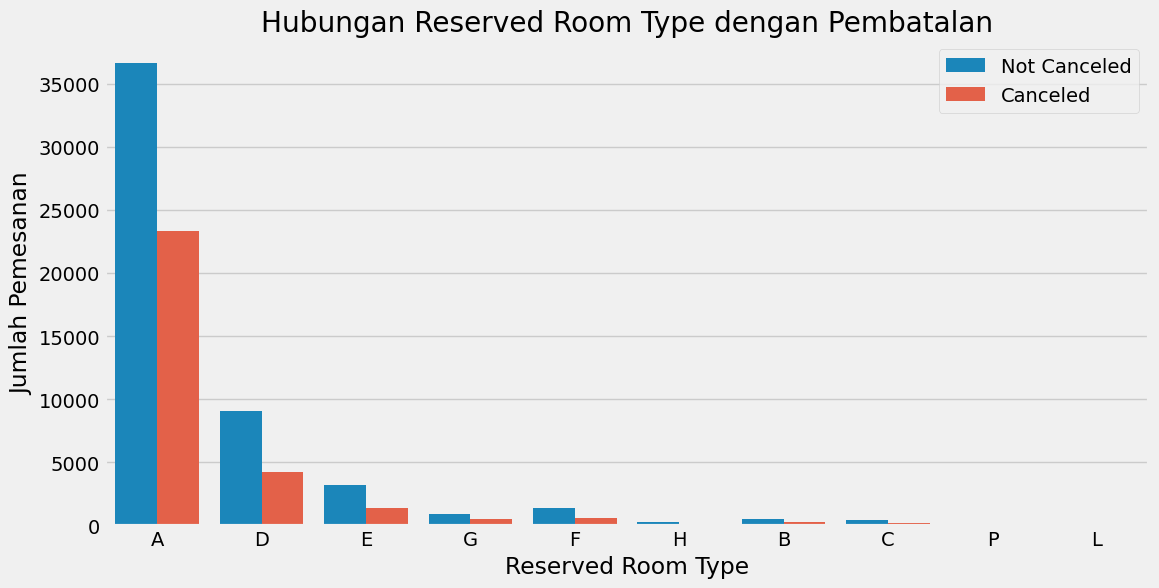

In [ ]:
# Visualisasi hubungan antara reserved_room_type dengan is_canceled
plt.figure(figsize=(12, 6))
sns.countplot(x='reserved_room_type', hue='is_canceled', data=df)
plt.title('Hubungan Reserved Room Type dengan Pembatalan')
plt.xlabel('Reserved Room Type')
plt.ylabel('Jumlah Pemesanan')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

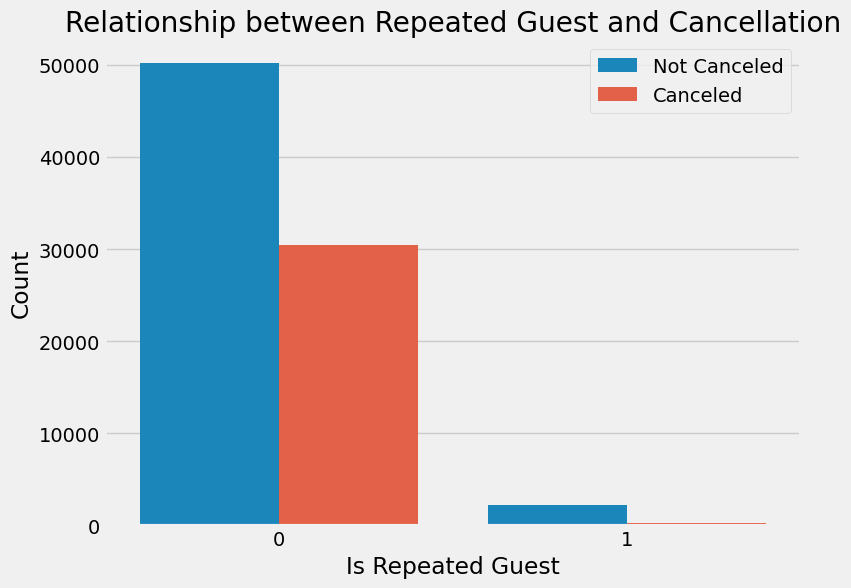

In [ ]:
# Visualisasi hubungan antara is_repeated_guest dengan is_canceled
plt.figure(figsize=(8, 6))
sns.countplot(x='is_repeated_guest', hue='is_canceled', data=df)
plt.title('Relationship between Repeated Guest and Cancellation')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Count')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

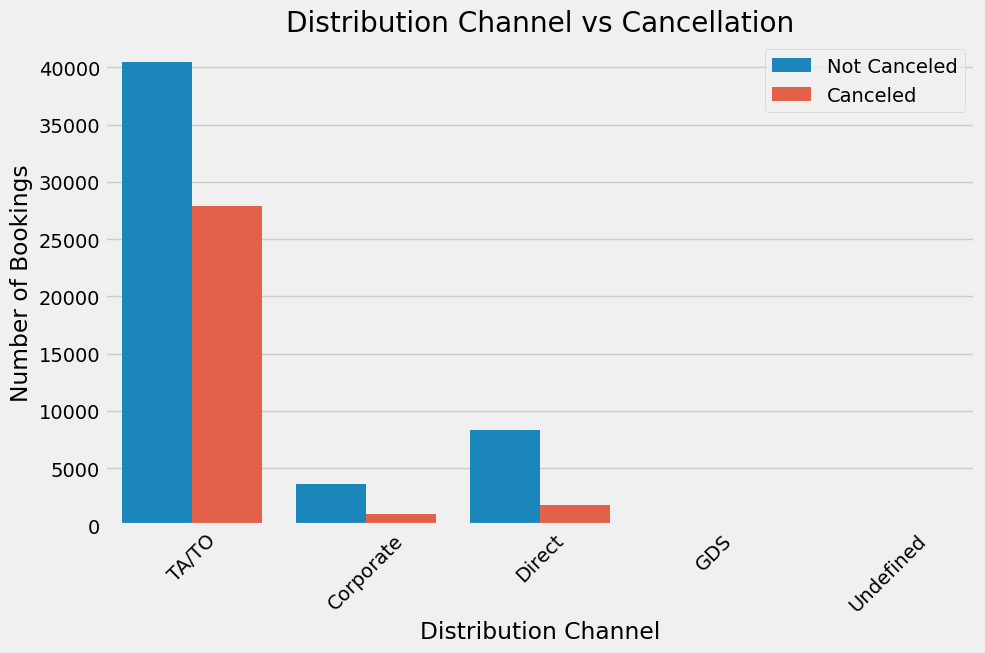

In [ ]:
# Visualisasi hubungan antara distribution_channel dengan is_canceled
plt.figure(figsize=(10, 6))
sns.countplot(x='distribution_channel', hue='is_canceled', data=df)
plt.title('Distribution Channel vs Cancellation')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

Interpretasi:

Grafik ini memberikan gambaran visual tentang saluran distribusi mana yang memiliki tingkat pembatalan yang lebih tinggi. Kita dapat melihat bahwa:

* Saluran TA/TO memiliki jumlah pemesanan tertinggi dan tingkat pembatalan yang cukup tinggi. Ini mengindikasikan bahwa pemesanan melalui agen perjalanan online (TA/TO) memiliki potensi pembatalan yang lebih besar dibandingkan dengan saluran lainnya.
* Saluran Corporate memiliki jumlah pemesanan yang lebih sedikit dibandingkan TA/TO, tetapi tingkat pembatalannya juga cukup signifikan. Ini mungkin karena pemesanan perusahaan seringkali melibatkan banyak orang dan keputusan yang lebih kompleks, sehingga lebih rentan terhadap perubahan rencana.
* Saluran Direct dan GDS memiliki jumlah pemesanan yang lebih sedikit dibandingkan TA/TO dan Corporate, dan tingkat pembatalannya juga lebih rendah. Ini menunjukkan bahwa pemesanan langsung atau melalui sistem distribusi global * (GDS) cenderung memiliki tingkat loyalitas yang lebih tinggi.
Saluran Undefined memiliki jumlah pemesanan yang sangat sedikit dan tingkat pembatalannya sulit diinterpretasikan karena kurangnya data.

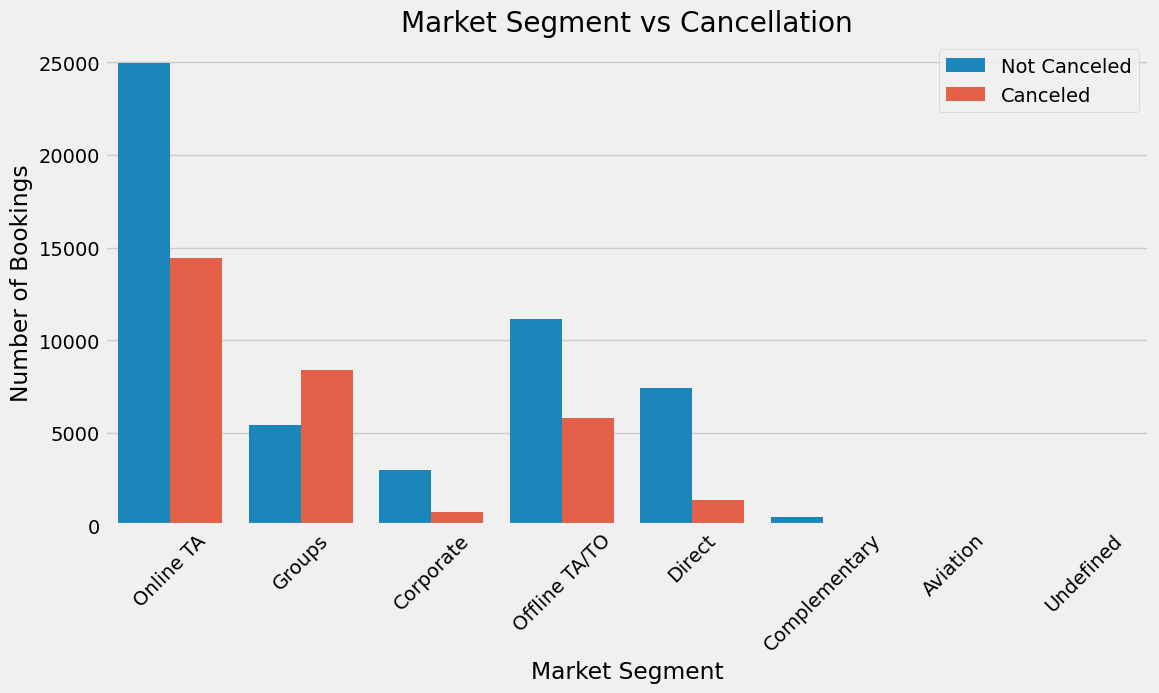

In [ ]:
# Visualisasi hubungan antara market_segment dengan is_canceled
plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=df)
plt.title('Market Segment vs Cancellation')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.legend(['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.show()

Interpretasi:

Grafik ini memberikan gambaran visual tentang segmen pasar mana yang memiliki tingkat pembatalan yang lebih tinggi. Kita dapat melihat bahwa:

* Segmen Online TA memiliki jumlah pemesanan tertinggi dan tingkat pembatalan yang relatif rendah. Ini mengindikasikan bahwa pelanggan yang memesan melalui agen perjalanan online cenderung lebih loyal dan jarang membatalkan pemesanan.
* Segmen Groups dan Corporate memiliki jumlah pemesanan yang cukup tinggi, tetapi juga memiliki tingkat pembatalan yang cukup signifikan. Ini mungkin karena pemesanan kelompok atau perusahaan seringkali melibatkan banyak orang dan keputusan yang lebih kompleks, sehingga lebih rentan terhadap perubahan rencana.
* Segmen Complementary, Aviation, dan Undefined memiliki jumlah pemesanan yang sangat sedikit dan tingkat pembatalan yang bervariasi. Ini mungkin karena segmen-segmen ini merupakan segmen yang lebih kecil atau memiliki karakteristik yang unik.

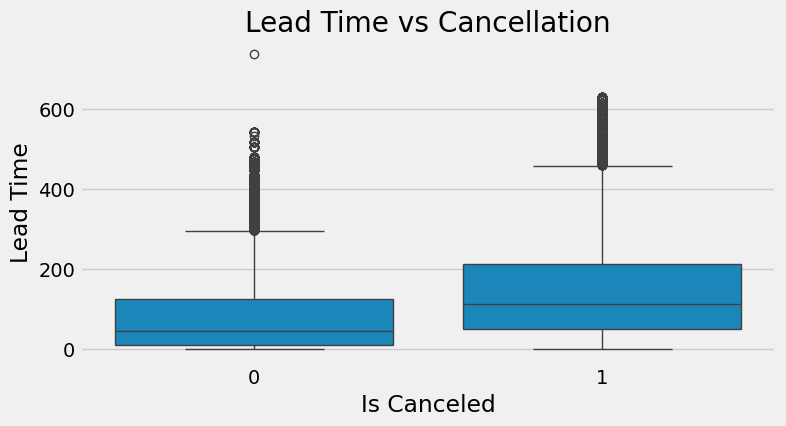

In [ ]:
# Visualisasi hubungan antara lead_time dengan is_canceled
plt.figure(figsize=(8, 4))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Lead Time')
plt.show()

Pemesanan yang dibatalkan (1) cenderung memiliki lead time yang lebih panjang, Terlihat bahwa kotak pada kelompok (1) (pembatalan) lebih tinggi dibandingkan dengan kelompok (0) (tidak dibatalkan). Ini mengindikasikan bahwa rata-rata dan sebagian besar data lead time pada pemesanan yang dibatalkan lebih tinggi

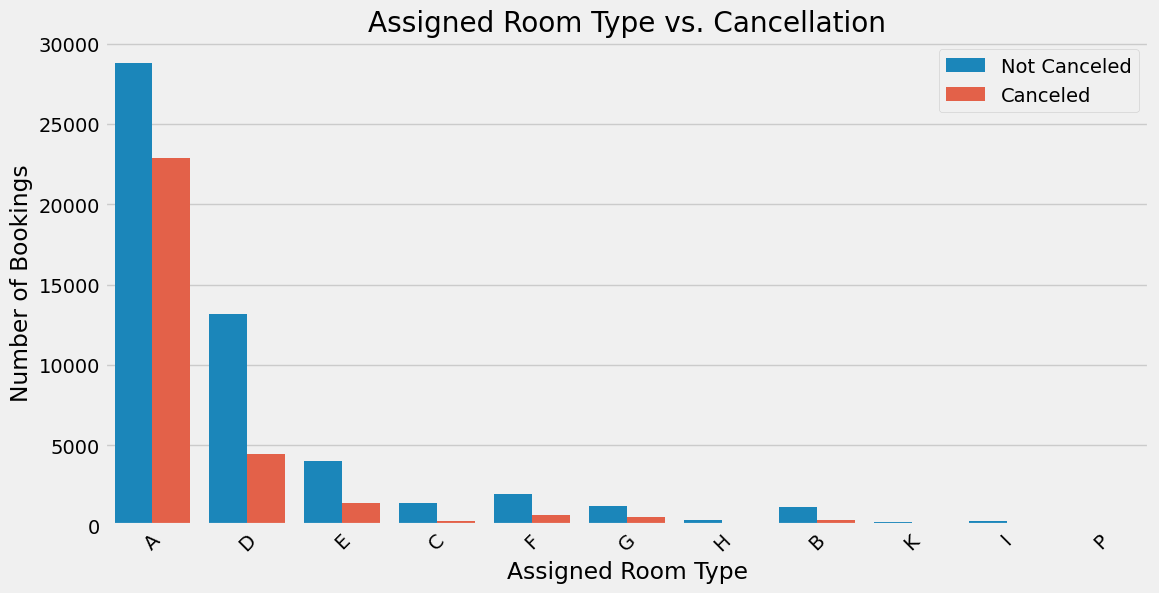

In [ ]:
# Visualisasi hubungan antara assigned_room_type dan is_canceled
plt.figure(figsize=(12, 6))
sns.countplot(x='assigned_room_type', hue='is_canceled', data=df)
plt.title('Assigned Room Type vs. Cancellation')
plt.xlabel('Assigned Room Type')
plt.ylabel('Number of Bookings')
plt.legend(['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.show()

Terlihat bahwa kamar tipe A memiliki jumlah pemesanan tertinggi, baik yang berhasil maupun yang dibatalkan. Ini mungkin mengindikasikan bahwa kamar tipe A adalah jenis kamar yang paling populer, tetapi juga memiliki tingkat pembatalan yang tinggi

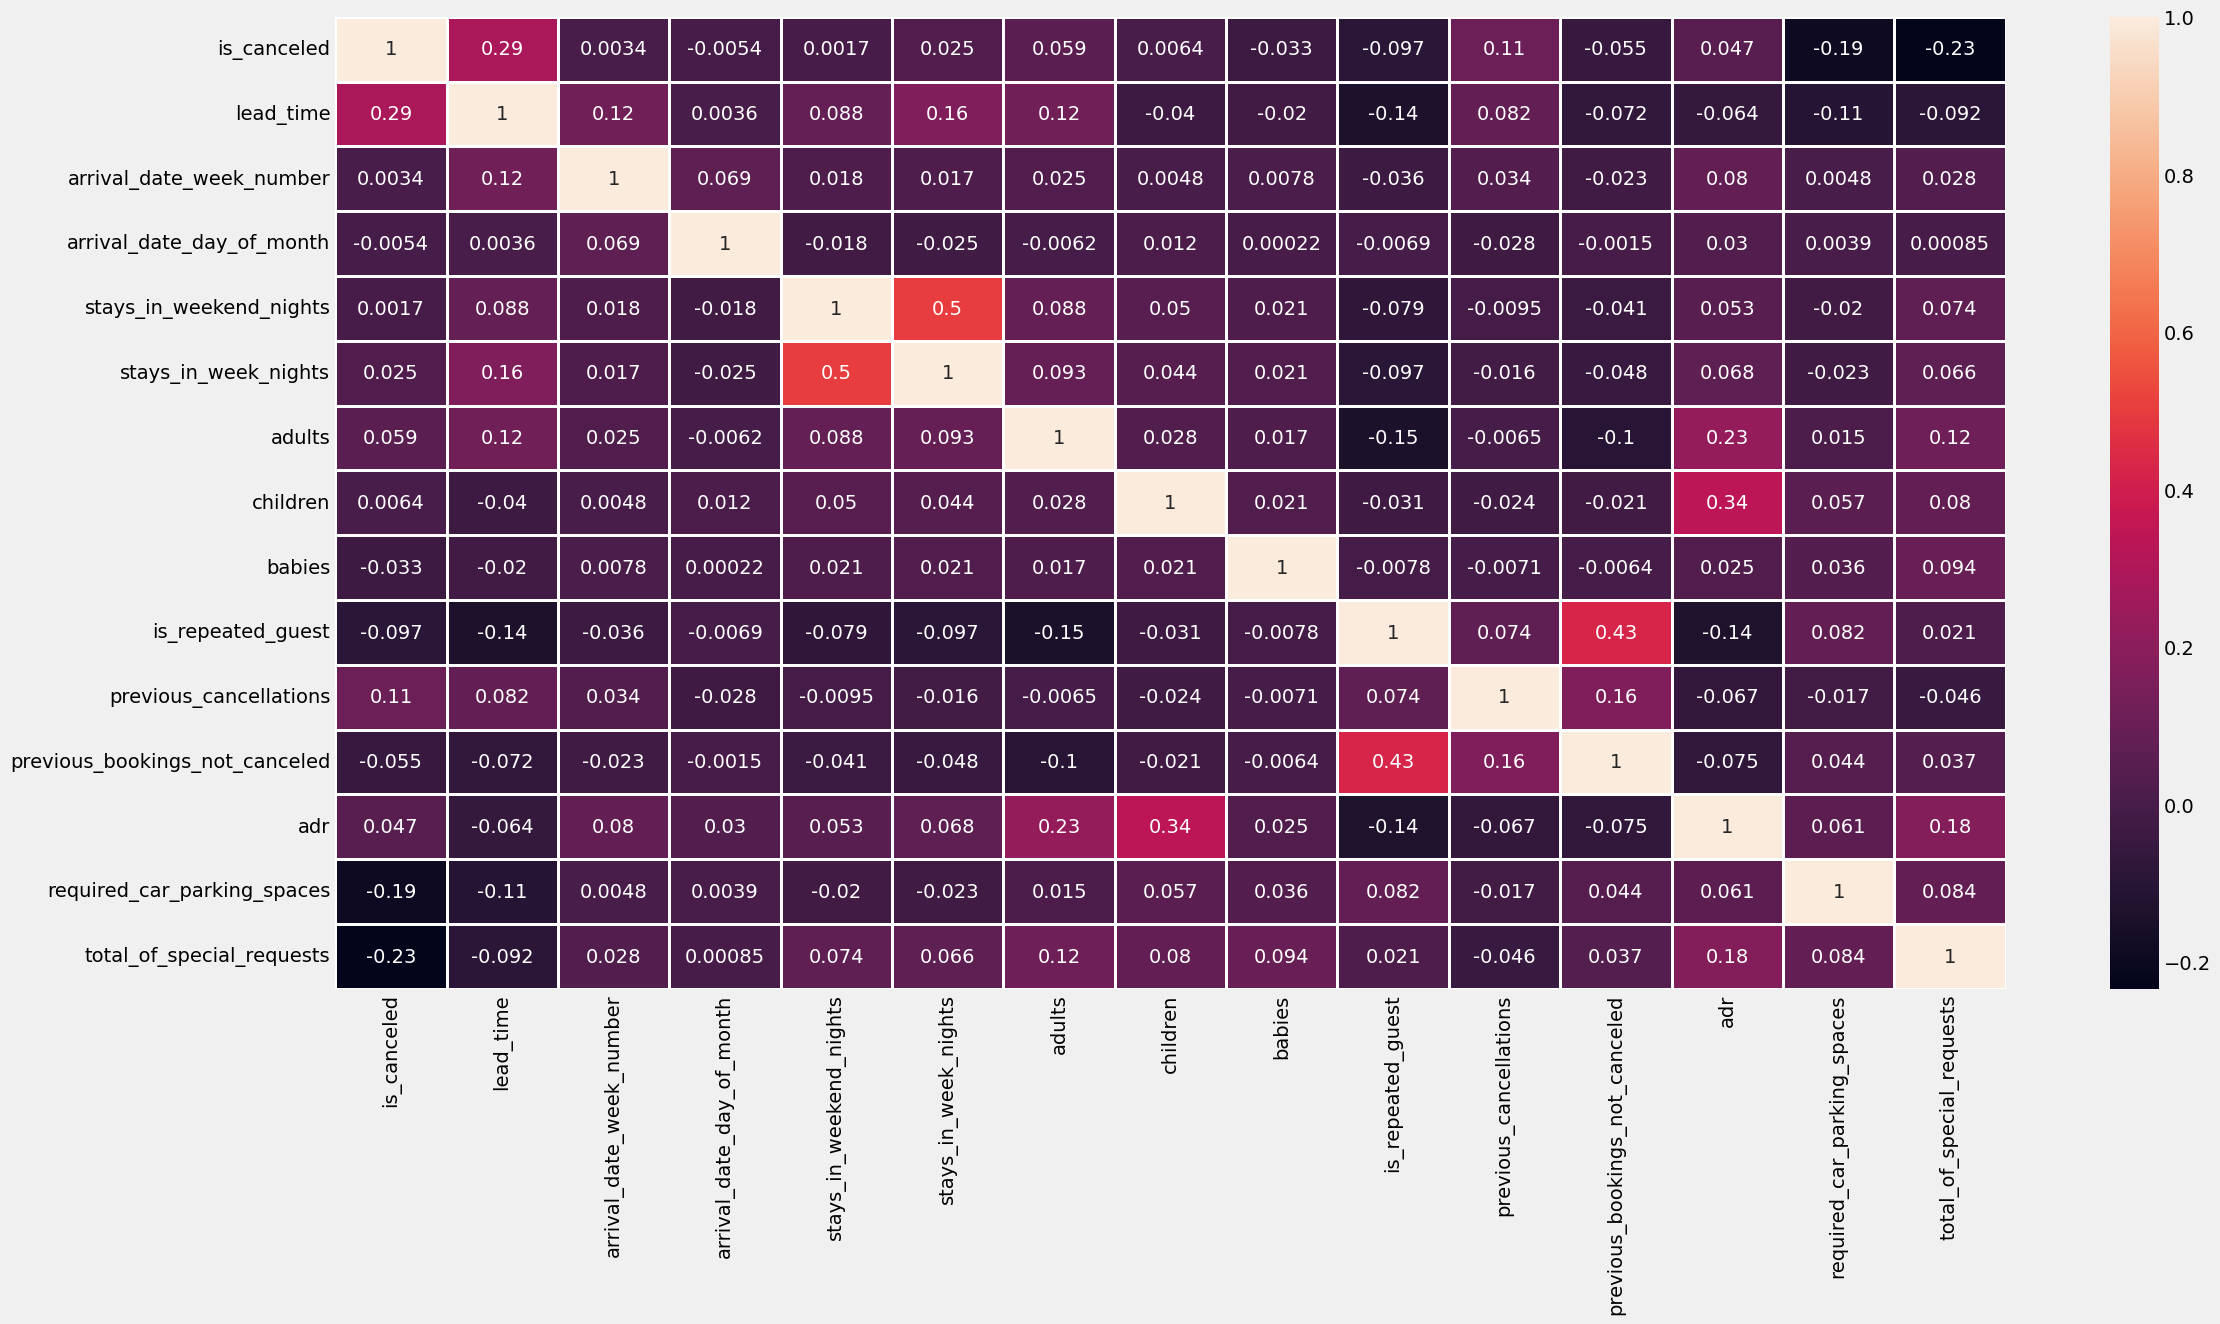

In [ ]:
plt.figure(figsize = (24, 12))

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix using the numerical features only
corr = numerical_df.corr()

sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

* stays_in_weekend_nights dan stays_in_week_nights: Jumlah malam menginap di akhir pekan dan di hari kerja memiliki korelasi positif yang sangat kuat. Ini masuk akal karena semakin lama seseorang menginap, semakin banyak malam yang dihabiskan baik di akhir pekan maupun di hari kerja.

* adults dan children: Jumlah orang dewasa dan anak-anak memiliki korelasi positif. Semakin banyak orang dewasa, semakin banyak pula anak-anak yang ikut menginap.

* previous_cancellations dan previous_bookings_not_canceled: Jumlah pembatalan sebelumnya dan jumlah pemesanan sebelumnya yang tidak dibatalkan memiliki korelasi positif yang kuat. Ini menunjukkan bahwa tamu yang sering membatalkan pemesanan juga cenderung sering melakukan pemesanan

# Feature Engineering

In [ ]:
# Combine 'stays_in_weekend_nights' and 'stays_in_week_nights'
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
# Drop original columns after feature engineering
df.drop(['stays_in_weekend_nights', 'stays_in_week_nights'], axis=1, inplace=True)

In [ ]:
df.total_stays

,total_stays
0,4
1,2
2,3
3,1
4,5
...,...
83288,2
83289,4
83290,14
83291,6


In [ ]:
# Create a feature for the total number of guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']
# Drop original columns after feature engineering
df.drop(['adults', 'children', 'babies'], axis=1, inplace=True)

In [ ]:
df.total_guests

,total_guests
0,2.0
1,2.0
2,2.0
3,1.0
4,2.0
...,...
83288,3.0
83289,2.0
83290,2.0
83291,3.0


In [ ]:
# Create a feature for the total number of previous bookings
df['total_previous_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']
# Drop original columns after feature engineering
df.drop(['previous_cancellations', 'previous_bookings_not_canceled'], axis=1, inplace=True)

In [ ]:
df.total_previous_bookings

,total_previous_bookings
0,0
1,0
2,0
3,0
4,0
...,...
83288,0
83289,0
83290,0
83291,0


In [ ]:
# Create an interaction feature between lead time and total guests
df['lead_time_guests_interaction'] = df['lead_time'] * df['total_guests']
# Drop original columns after feature engineering
df.drop(['lead_time', 'total_guests'], axis=1, inplace=True)

In [ ]:
df.lead_time_guests_interaction

,lead_time_guests_interaction
0,16.0
1,1048.0
2,350.0
3,0.0
4,66.0
...,...
83288,12.0
83289,60.0
83290,330.0
83291,540.0


In [ ]:
# Convert 'arrival_date_month' to numerical representation
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)

In [ ]:
meal_mapping = {'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}
# Apply the mapping to create the new feature
df['meal'] = df['meal'].map(meal_mapping)

In [ ]:
distribution_channel_mapping = {'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3, 'GDS': 4}
# Apply the mapping to create the new feature
df['distribution_channel'] = df['distribution_channel'].map(distribution_channel_mapping)

In [ ]:
reserved_room_type_mapping = {'A': 0, 'B': 1, 'C': 2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9, 'L':10, 'P':11}
# Apply the mapping to create the new feature
df['reserved_room_type'] = df['reserved_room_type'].map(reserved_room_type_mapping)

In [ ]:
assigned_room_type_mapping = {'A': 0, 'B': 1, 'C': 2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9, 'L':10, 'P':11}
# Apply the mapping to create the new feature
df['assigned_room_type'] = df['assigned_room_type'].map(assigned_room_type_mapping)

In [ ]:
customer_type_mapping = {'Transient': 0, 'Transient-Party': 1, 'Contract': 2, 'Group': 3}
# Apply the mapping to create the new feature
df['customer_type'] = df['customer_type'].map(customer_type_mapping)

In [ ]:
market_segment_mapping = {'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 'Groups': 5, 'Undefined':6, 'Aviation':7}
# Apply the mapping to create the new feature
df['market_segment'] = df['market_segment'].map(market_segment_mapping)

In [ ]:
deposit_type_mapping = {'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2}
df['deposit_type'] = df['deposit_type'].map(deposit_type_mapping)

In [ ]:
# Drop original columns after feature engineering
df.drop(['reservation_status_date'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   is_canceled                   83293 non-null  int64  
 1   arrival_date_month            83293 non-null  int64  
 2   arrival_date_week_number      83293 non-null  int64  
 3   arrival_date_day_of_month     83293 non-null  int64  
 4   meal                          83293 non-null  int64  
 5   market_segment                83293 non-null  int64  
 6   distribution_channel          83293 non-null  int64  
 7   is_repeated_guest             83293 non-null  int64  
 8   reserved_room_type            83293 non-null  int64  
 9   assigned_room_type            83293 non-null  int64  
 10  deposit_type                  83293 non-null  int64  
 11  customer_type                 83293 non-null  int64  
 12  adr                           83293 non-null  float64
 13  r

In [ ]:
df.head()

,is_canceled,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stays,total_previous_bookings,lead_time_guests_interaction
0,0,1,2,10,0,2,2,0,0,0,0,0,38.40,0,0,4,0,16.0
1,1,12,51,15,0,5,2,0,0,0,1,0,62.80,0,0,2,0,1048.0
2,1,5,20,19,0,5,2,0,0,0,1,0,110.00,0,0,3,0,350.0
3,0,10,43,17,0,1,1,0,0,0,0,0,45.00,0,0,1,0,0.0
4,1,9,39,26,0,3,2,0,0,0,0,0,57.92,0,1,5,0,66.0


In [ ]:
# Separate features and target variable
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Apply StandardScaler to all columns except 'is_canceled'
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features with the target variable
df = pd.concat([X_scaled_df, y], axis=1)

# Now 'df_scaled' contains your data with all numerical features (except 'is_canceled') scaled.
df.head()

,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stays,total_previous_bookings,lead_time_guests_interaction,is_canceled
0,-1.794294,-1.847081,-0.659321,-0.519674,-0.329758,0.435815,-0.176595,-0.581626,-0.706195,-0.37374,-0.53104,-1.317001,-0.252292,-0.720572,0.219368,-0.120612,-0.758544,0
1,1.760620,1.749600,-0.089577,-0.519674,1.784839,0.435815,-0.176595,-0.581626,-0.706195,2.61263,-0.53104,-0.809537,-0.252292,-0.720572,-0.556061,-0.120612,3.273222,1
2,-0.501598,-0.525851,0.366218,-0.519674,1.784839,0.435815,-0.176595,-0.581626,-0.706195,2.61263,-0.53104,0.172114,-0.252292,-0.720572,-0.168347,-0.120612,0.546310,1
3,1.114272,1.162387,0.138320,-0.519674,-1.034623,-1.035383,-0.176595,-0.581626,-0.706195,-0.37374,-0.53104,-1.179736,-0.252292,-0.720572,-0.943776,-0.120612,-0.821052,0
4,0.791098,0.868780,1.163859,-0.519674,0.375108,0.435815,-0.176595,-0.581626,-0.706195,-0.37374,-0.53104,-0.911030,-0.252292,0.539291,0.607083,-0.120612,-0.563207,1


# Models

In [ ]:
# Extract features (X) and target (y)
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [ ]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify=y)

In [ ]:
X_train.head()

,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stays,total_previous_bookings,lead_time_guests_interaction
62365,0.791098,0.942182,1.163859,-0.519674,-0.329758,0.435815,-0.176595,-0.581626,-0.706195,-0.37374,-0.53104,-0.029624,-0.252292,0.539291,1.382512,-0.120612,1.108882
23199,0.144750,0.208165,0.480167,-0.519674,-0.329758,0.435815,-0.176595,-0.581626,-0.706195,-0.37374,-0.53104,-0.429355,-0.252292,0.539291,-0.943776,-0.120612,-0.352242
24586,-0.824772,-0.966261,-1.115115,2.287831,-0.329758,0.435815,-0.176595,-0.581626,-0.706195,-0.37374,-0.53104,0.380091,-0.252292,-0.720572,0.219368,-0.120612,-0.531953
35385,-1.794294,-1.773679,-0.545372,-0.519674,-1.739489,-2.506580,5.662676,-0.581626,-0.706195,-0.37374,-0.53104,-1.221331,-0.252292,0.539291,0.219368,0.933881,-0.821052
1984,-1.471120,-1.553474,-1.456962,-0.519674,0.375108,0.435815,-0.176595,-0.581626,0.889242,-0.37374,-0.53104,-0.867771,-0.252292,-0.720572,0.607083,-0.120612,-0.367869


In [ ]:
y_train.head(), y_test.head()

(62365    0
 23199    0
 24586    0
 35385    0
 1984     0
 Name: is_canceled, dtype: int64,
 19219    0
 40146    0
 62885    1
 22653    1
 50926    1
 Name: is_canceled, dtype: int64)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

acc_lr = f1_score(y_test, y_pred_lr)
acc_lr_train = f1_score(y_train, y_pred_lr_train)

print(f"f1 Score of Logistic Regression is : {acc_lr}")
print(f"f1 Score of Logistic Regression is : {acc_lr_train}")

f1 Score of Logistic Regression is : 0.6307609860664524
f1 Score of Logistic Regression is : 0.6224145391605366


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8113494477349128
Confusion Matrix : 
[[13861  1894]
 [ 2820  6413]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     15755
           1       0.77      0.69      0.73      9233

    accuracy                           0.81     24988
   macro avg       0.80      0.79      0.79     24988
weighted avg       0.81      0.81      0.81     24988



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

nb = GaussianNB()
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
y_pred_nb_train = nb.predict(X_train)

acc_nb = f1_score(y_test, y_pred_nb)
acc_nb_train = f1_score(y_train, y_pred_nb_train)

print(f"f1 Score of GaussianNB is : {acc_nb}")
print(f"f1 Score of GaussianNB is : {acc_nb_train}")

f1 Score of GaussianNB is : 0.5720813771517997
f1 Score of GaussianNB is : 0.5722443398882052


In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
y_pred_dtc_train = dtc.predict(X_train)

acc_dtc = f1_score(y_test, y_pred_dtc)
acc_dtc_train = f1_score(y_train, y_pred_dtc_train)

print(f"f1 Score of DecisionTreeClassifier is : {acc_dtc}")
print(f"f1 Score of DecisionTreeClassifier is : {acc_dtc_train}")

f1 Score of DecisionTreeClassifier is : 0.738283137381221
f1 Score of DecisionTreeClassifier is : 0.9889469265926686


In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
confi = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of xgb is : {acc_xgb}")
print(f"Confusion Matrix : \n{confi}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of xgb is : 0.8390827597246678
Confusion Matrix : 
[[14567  1188]
 [ 2833  6400]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     15755
           1       0.84      0.69      0.76      9233

    accuracy                           0.84     24988
   macro avg       0.84      0.81      0.82     24988
weighted avg       0.84      0.84      0.84     24988



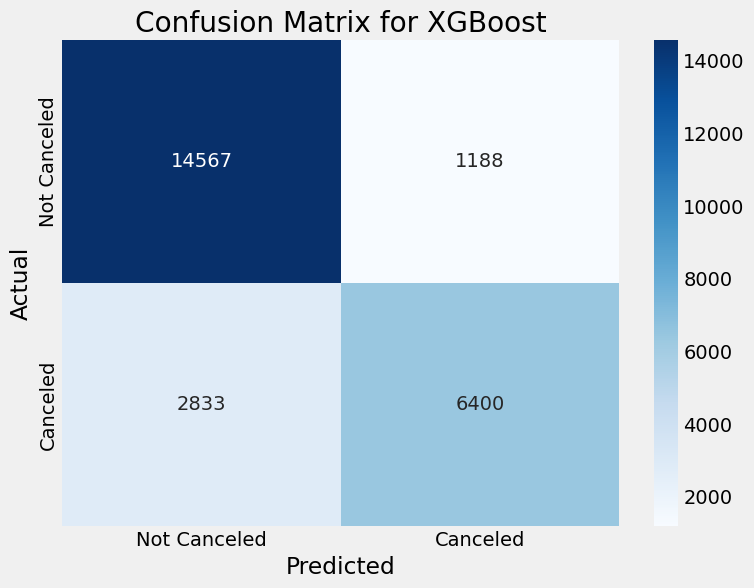

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

overfit

In [ ]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.482937
0:	learn: 0.5468774	total: 59.3ms	remaining: 5.87s
1:	learn: 0.4840409	total: 68.8ms	remaining: 3.37s
2:	learn: 0.4555949	total: 78.1ms	remaining: 2.53s
3:	learn: 0.4396275	total: 88.1ms	remaining: 2.11s
4:	learn: 0.4298834	total: 97.5ms	remaining: 1.85s
5:	learn: 0.4230820	total: 111ms	remaining: 1.74s
6:	learn: 0.4190386	total: 120ms	remaining: 1.6s
7:	learn: 0.4146795	total: 130ms	remaining: 1.49s
8:	learn: 0.4104337	total: 139ms	remaining: 1.4s
9:	learn: 0.4087524	total: 150ms	remaining: 1.35s
10:	learn: 0.4063044	total: 160ms	remaining: 1.29s
11:	learn: 0.4042040	total: 170ms	remaining: 1.24s
12:	learn: 0.4030570	total: 178ms	remaining: 1.19s
13:	learn: 0.4020613	total: 190ms	remaining: 1.16s
14:	learn: 0.3994733	total: 202ms	remaining: 1.14s
15:	learn: 0.3990303	total: 210ms	remaining: 1.1s
16:	learn: 0.3979819	total: 219ms	remaining: 1.07s
17:	learn: 0.3970021	total: 228ms	remaining: 1.04s
18:	learn: 0.3954306	total: 238ms	remaining: 1.01s
19:	learn

In [ ]:
print(f"Accuracy Score of cat Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of cat Boost Classifier is : 0.8301584760685129
Confusion Matrix : 
[[14570  1185]
 [ 3059  6174]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.92      0.87     15755
           1       0.84      0.67      0.74      9233

    accuracy                           0.83     24988
   macro avg       0.83      0.80      0.81     24988
weighted avg       0.83      0.83      0.83     24988



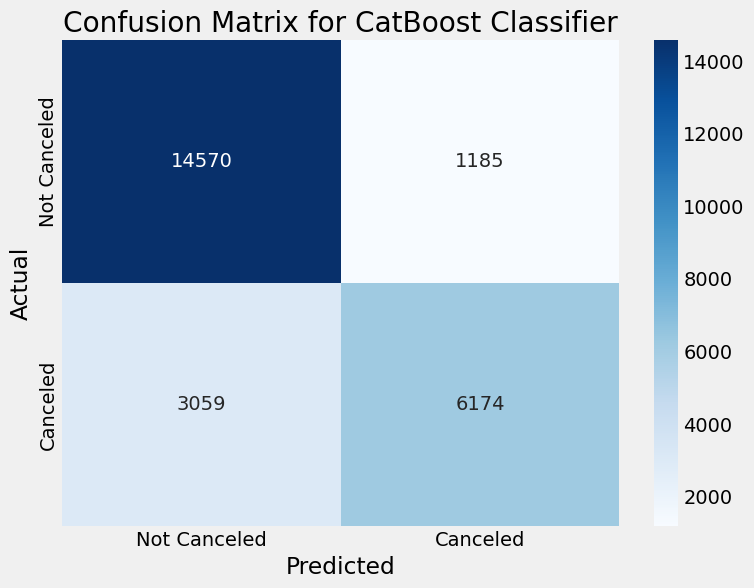

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_cat)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

# Validation

In [ ]:
# Train your CatBoost model and store history
cat = CatBoostClassifier(iterations=100, eval_metric='Accuracy', verbose=False)
# verbose=False to suppress detailed output during training
cat_history = cat.fit(X_train, y_train, eval_set=(X_test, y_test), plot=False) # Added eval_set and plot=False

# Access the training and validation metrics from cat_history
train_acc = cat_history.evals_result_['learn']['Accuracy']
val_acc = cat_history.evals_result_['validation']['Accuracy']
epoch = range(1, len(train_acc) + 1) # Adjust epoch based on training iterations


accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})

px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Cat Boost', 'Naive Bayes', 'XGBoost'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_cat, acc_nb, acc_xgb]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,XGBoost,0.839083
3,Cat Boost,0.830158
1,KNN,0.811349
2,Decision Tree Classifier,0.738283
0,Logistic Regression,0.630761
4,Naive Bayes,0.572081


In [ ]:
# Sort the DataFrame before plotting
models = models.sort_values(by='Score', ascending=True)

# Create the bar chart without the 'ascending' argument
fig = px.bar(
    data_frame=models,
    x='Score',
    y='Model',
    color='Score',
    template='plotly_dark',
    title='Models Comparison'
)

# Show the chart
fig.show()

# Interpretation

In [ ]:
var_name = df.drop(['is_canceled'], axis = 1).columns.tolist()
var_name

['arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_stays',
 'total_previous_bookings',
 'lead_time_guests_interaction']

In [ ]:
!pip install -U eli5
!pip install scikit-learn==1.2.2  # Install compatible version of scikit-learn
import eli5

plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"]

eli5.explain_weights_df(
    XGBClassifier, feature_names=var_name
).assign(
    # create new weight called exp_weight
    exp_weight=lambda x: x['weight'].map(lambda x: np.exp(x))
).sort_values(
    by="exp_weight"
).plot(
    x='feature',
    y='exp_weight',  # Fixed: added comma
    kind='barh'  # Fixed: aligned with .plot()
)  # Fixed: closed bracket

AttributeError: 'NoneType' object has no attribute 'assign'